# This notebook is about path search

First let's create a grid where the start is (0,0) and the goal is (4,5), we use 0 for open space and -1 for walls

In [1]:
grid = [  # grid of the map
    [0, 0, -1, 0, 0, 0],
    [0, 0, -1, 0, 0, 0],
    [0, 0, 0, 0, -1, 0],
    [0, 0, -1, -1, 0, 0],
    [0, 0, 0, 0, -1, 0]
]
start = (0, 0)  # start index
goal = (4, 5)  # goal index

Now let's draw the map to see what the world look like

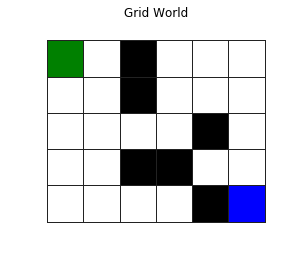

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure(1)  # create figure
ax = fig.add_subplot(111)  # create axes for plot

gridcol = len(grid[0])  # number of cols of grid
gridrow = len(grid)  # number of rows of grid


def visualize():
    plt.axis('scaled')  # make sure 1x1 is displayed as squares
    plt.axis('off')  # don't show the axis
    plt.axis([-0.5, gridcol + 0.5, -gridrow - 0.5, 0.5])  # [xmin, xmax, ymin, ymax]

    ax.add_patch(patches.Rectangle((0, 0), gridcol, -gridrow, fc='none', ec='k'))
    for i in range(gridrow):
        for j in range(gridcol):
            if (i, j) == start:
                ax.add_patch(patches.Rectangle((j, -i), 1, -1, fc='g', ec='#222222'))
            elif (i, j) == goal:
                ax.add_patch(patches.Rectangle((j, -i), 1, -1, fc='b', ec='#222222'))
            elif grid[i][j] == -1:
                ax.add_patch(patches.Rectangle((j, -i), 1, -1, fc='k', ec='#222222'))
            else:
                ax.add_patch(patches.Rectangle((j, -i), 1, -1, fc='none', ec='#222222'))


visualize()
plt.title("Grid World")
plt.show()    

In the above figure, the green cell is the start position while the blue cell is the goal position

## Breadth First Search Algorithm

Now we need to find out a way to search a path from the start to the goal, for simplicity, we assume that four actions are available, i.e. north, south, west and east. Assuming that costs for moving in each direction are the same, the easiest and simpliest search way is breadth first search

In [4]:
delta = [
    [-1, 0],  # go north/up
    [1, 0],  # go south/down
    [0, -1],  # go west/left
    [0, 1]  # go east/right
]

from collections import deque


def BFS_Path(grid, start, goal):
    '''
    (matrix, index, index) ==> (number, maxtrix, matrix, matrix)

    return the total cost from start to goal, assuming that the cost of each step is 1
    '''
    gridcol = len(grid[0])  # number of cols of grid
    gridrow = len(grid)  # number of rows of grid
    cost_matrix = [[-1 for i in range(gridcol)] for j in range(gridrow)]  # keep track of the cost of search
    expansion = [[-1 for i in range(gridcol)] for j in range(gridrow)]  # keep track of the expansion of search
    actions = [[-1 for i in range(gridcol)] for j in range(gridrow)]  # keep track of the actions at each step
    expand_num = 0

    active = deque([])  # keep track of the current active search
    if start == goal:  # return if start and goal are the same
        return 0, expansion
    active.append((0, start[0], start[1]))
    cost_matrix[start[0]][start[1]] = 0
    expansion[start[0]][start[1]] = 0

    while True:
        active_size = len(active)
        if active_size == 0:
            return -1, cost_matrix, expansion, actions  # no path available, return -1 as cost

        for i in range(active_size):
            cost, x, y = active.popleft()
            for actionindex, eachaction in enumerate(delta):
                x2 = x + eachaction[0]
                y2 = y + eachaction[1]
                if 0 <= x2 and x2 < gridrow and 0 <= y2 and y2 < gridcol and cost_matrix[x2][y2] == -1 and grid[x2][
                    y2] == 0:
                    cost2 = cost + 1
                    cost_matrix[x2][y2] = cost2
                    active.append((cost2, x2, y2))

                    expand_num += 1
                    expansion[x2][y2] = expand_num

                    actions[x2][y2] = actionindex

                    if (x2, y2) == goal:
                        return cost2, cost_matrix, expansion, actions
                        # found a path, return cost, cost_matrix and expansion matrix                 


## now let's see what happens with the above algorithm:

cost, cost_matrix, expansion, actions = BFS_Path(grid, start, goal)
print(
    "The cost from start ({}, {}) to goal ({}, {}) under BFS is {}!".format(start[0], start[1], goal[0], goal[1], cost))
print('''--------------------The intermediate costs are:---------------------------''')
print(cost_matrix)
print('''--------------------The searching orders are:---------------------------''')
print(expansion)
print('''--------------------The searching actions are:---------------------------''')
print(actions)

The cost from start (0, 0) to goal (4, 5) under BFS is 11!
--------------------The intermediate costs are:---------------------------
[[0, 1, -1, 7, 8, 9], [1, 2, -1, 6, 7, 8], [2, 3, 4, 5, -1, 9], [3, 4, -1, -1, -1, 10], [4, 5, 6, 7, -1, 11]]
--------------------The searching orders are:---------------------------
[[0, 2, -1, 15, 17, 19], [1, 4, -1, 13, 16, 18], [3, 6, 9, 11, -1, 20], [5, 8, -1, -1, -1, 21], [7, 10, 12, 14, -1, 22]]
--------------------The searching actions are:---------------------------
[[-1, 3, -1, 0, 3, 3], [1, 3, -1, 0, 3, 3], [1, 3, 3, 3, -1, 1], [1, 3, -1, -1, -1, 1], [1, 3, 3, 3, -1, 1]]


Let's try to visualize the expansion code so that we can see it more clear!

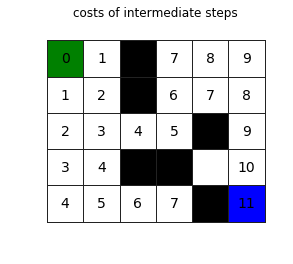

In [5]:
def drawcost(expansion):
    for i in range(gridrow):
        for j in range(gridcol):
            if expansion[i][j] != -1:
                ax.text(j + 0.5, -i - 0.5, str(expansion[i][j]), horizontalalignment='center',
                        verticalalignment='center', fontsize=14)


fig = plt.figure(1)  # create figure
ax = fig.add_subplot(111)  # create axes for plot
visualize()
drawcost(cost_matrix)
plt.title("costs of intermediate steps")
plt.show()


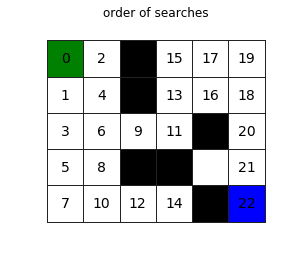

In [6]:
fig = plt.figure(1)  # create figure
ax = fig.add_subplot(111)  # create axes for plot
visualize()
drawcost(expansion)
plt.title("order of searches")
plt.show()

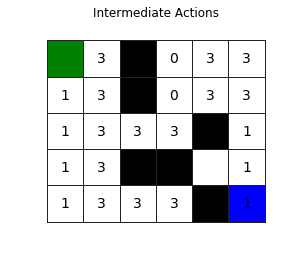

In [7]:
fig = plt.figure(1)  # create figure
ax = fig.add_subplot(111)  # create axes for plot
visualize()
drawcost(actions)
plt.title("Intermediate Actions")
plt.show()

### Figure out the path

With the given intermediate actions, we are able to figure out the paths

In [8]:
def getPath(actions, goal, start):
    path = []
    path.append(goal)
    x = goal[0]
    y = goal[1]
    while True:
        if actions[x][y] == -1:
            break
        x2 = x - delta[actions[x][y]][0]
        y2 = y - delta[actions[x][y]][1]
        path.append((x2, y2))
        if (x2, y2) == start:
            break
        x, y = x2, y2
    path.reverse()
    return path


path = getPath(actions, goal, start)
print("The path is:")
print(path)

The path is:
[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5)]


The path looks correct, but let's visualize it to make it more clear.

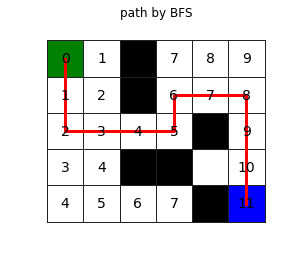

In [9]:
def drawPath(path):
    xarray = []
    yarray = []
    for eachnode in path:
        xarray.append(eachnode[1] + 0.5)
        yarray.append(-eachnode[0] - 0.5)
    ax.plot(xarray, yarray, 'r-', lw=3)


fig = plt.figure(1)  # create figure
ax = fig.add_subplot(111)  # create axes for plot
visualize()
drawcost(cost_matrix)
drawPath(path)
plt.title("path by BFS")
plt.show()

## Low Cost First Search
The above result looks good so far except that the costs for different moves are the same, which is not likely true for most situations. If the costs are different, then BFS search won't work. An easy modification can solve this problem. We just need to expand the search starting from the one with the lowest cost.

In [10]:
delta = [
    [-1,  0],  # go north/up
    [ 1,  0],  # go south/down
    [ 0, -1],  # go west/left
    [ 0,  1],  # go east/right
    [-1, -1],  # go northwest
    [-1,  1],  # go northeast
    [ 1, -1],  # go southwest
    [ 1,  1]   # go southeast
]
delta_cost = [2, 2, 2, 2, 3, 3, 3, 3]  # moving diagonally result in 1.5 times cost than vertical or horizontal moves


def LCF_Path(grid, start, goal):
    '''
    (matrix, index, index) ==> (number, maxtrix, matrix, matrix)

    return the total cost from start to goal, assuming that the cost of each step is 1
    '''
    gridcol = len(grid[0])  # number of cols of grid
    gridrow = len(grid)  # number of rows of grid
    cost_matrix = [[-1 for i in range(gridcol)] for j in range(gridrow)]  # keep track of the cost of search
    expansion = [[-1 for i in range(gridcol)] for j in range(gridrow)]  # keep track of the expansion of search
    actions = [[-1 for i in range(gridcol)] for j in range(gridrow)]  # keep track of the actions at each step
    expand_num = 0

    active = []  # keep track of the current active search
    if start == goal:  # return if start and goal are the same
        return 0, expansion
    active.append([0, start[0], start[1]])
    cost_matrix[start[0]][start[1]] = 0
    expansion[start[0]][start[1]] = 0

    while True:
        if len(active) == 0:
            return -1, cost_matrix, expansion, actions  # no path available, return -1 as cost

        active.sort()  # sort the list so that the least cost item is popped first
        active.reverse()
        cost, x, y = active.pop()

        for actionindex, eachaction in enumerate(delta):
            x2 = x + eachaction[0]
            y2 = y + eachaction[1]

            if 0 <= x2 and x2 < gridrow and 0 <= y2 and y2 < gridcol and cost_matrix[x2][y2] == -1 and grid[x2][
                y2] == 0:
                cost2 = cost + delta_cost[actionindex]
                cost_matrix[x2][y2] = cost2
                active.append([cost2, x2, y2])

                expand_num += 1
                expansion[x2][y2] = expand_num

                actions[x2][y2] = actionindex

                if (x2, y2) == goal:
                    return cost2, cost_matrix, expansion, actions
                    # found a path, return cost, cost_matrix and expansion matrix


## now let's see what happens with the above algorithm:

cost, cost_matrix, expansion, actions = LCF_Path(grid, start, goal)
print(
    "The cost from start ({}, {}) to goal ({}, {}) under BFS is {}!".format(start[0], start[1], goal[0], goal[1], cost))
print('''--------------------The intermediate costs are:---------------------------''')
print(cost_matrix)
print('''--------------------The searching orders are:---------------------------''')
print(expansion)
print('''--------------------The searching actions are:---------------------------''')
print(actions)


The cost from start (0, 0) to goal (4, 5) under BFS is 14!
--------------------The intermediate costs are:---------------------------
[[0, 2, -1, 11, 12, 14], [2, 3, -1, 9, 11, 13], [4, 5, 6, 8, -1, 14], [6, 7, -1, -1, 11, 13], [8, 9, 10, 12, -1, 14]]
--------------------The searching orders are:---------------------------
[[0, 2, -1, 16, 17, 20], [1, 3, -1, 10, 14, 19], [4, 5, 6, 9, -1, 21], [7, 8, -1, -1, 15, 22], [11, 12, 13, 18, -1, 23]]
--------------------The searching actions are:---------------------------
[[-1, 3, -1, 0, 5, 5], [1, 7, -1, 5, 5, 3], [1, 7, 7, 3, -1, 7], [1, 7, -1, -1, 7, 3], [1, 7, 7, 3, -1, 7]]


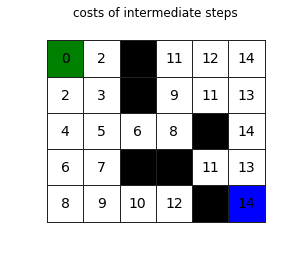

In [11]:
fig = plt.figure(1)  # create figure
ax = fig.add_subplot(111)  # create axes for plot
visualize()
drawcost(cost_matrix)
plt.title("costs of intermediate steps")
plt.show()

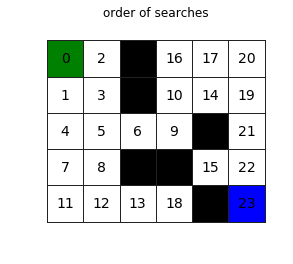

In [12]:
fig = plt.figure(1)  # create figure
ax = fig.add_subplot(111)  # create axes for plot
visualize()
drawcost(expansion)
plt.title("order of searches")
plt.show()

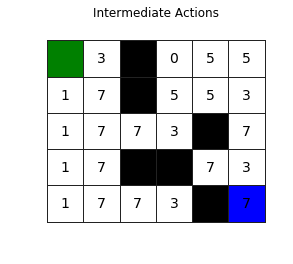

In [13]:
fig = plt.figure(1)  # create figure
ax = fig.add_subplot(111)  # create axes for plot
visualize()
drawcost(actions)
plt.title("Intermediate Actions")
plt.show()

The path is:
[(0, 0), (1, 1), (2, 2), (2, 3), (3, 4), (4, 5)]


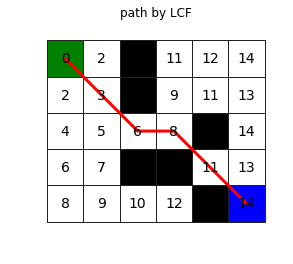

In [14]:
path = getPath(actions, goal, start)
print("The path is:")
print(path)

fig = plt.figure(1)  # create figure
ax = fig.add_subplot(111)  # create axes for plot
visualize()
drawcost(cost_matrix)
drawPath(path)
plt.title("path by LCF")
plt.show()


# A* search Algorithm
The above results looks all good, except that the search algorithm did a lot of useless searches. One way to solve this is using A* searching algorithms, which is fast if the search space is large. The idea is that we sort the active array which stores the waiting list of active intermediate points by a new cost, which is $$ newcost=cost+heuristiccost$$
The $heuristiccost$ is valid for a cell, as long as the heuristic cost of that cell is no larger than the actual minimum cost from that cell to the goal. $$heruristiccost\leq min(acutalcost)$$
For the diagonal move case, a good $heuristiccost$ could be $$ heuristiccost=max(xcostfromgoal, ycostfromgoal)$$

In [15]:
def Astar_Path(grid, start, goal):
    '''
    (matrix, index, index) ==> (number, maxtrix, matrix, matrix)

    return the total cost from start to goal, assuming that the cost of each step is 1
    '''
    gridcol = len(grid[0])  # number of cols of grid
    gridrow = len(grid)  # number of rows of grid
    cost_matrix = [[-1 for i in range(gridcol)] for j in range(gridrow)]  # keep track of the cost of search
    expansion = [[-1 for i in range(gridcol)] for j in range(gridrow)]  # keep track of the expansion of search
    actions = [[-1 for i in range(gridcol)] for j in range(gridrow)]  # keep track of the actions at each step
    expand_num = 0

    active = []  # keep track of the current active search
    if start == goal:  # return if start and goal are the same
        return 0, expansion
    heucost = 0 + max(abs(start[0] - goal[0]), abs(start[1] - goal[1])) * 2
    active.append([heucost, 0, start[0], start[1]])
    cost_matrix[start[0]][start[1]] = 0
    expansion[start[0]][start[1]] = 0

    while True:
        if len(active) == 0:
            return -1, cost_matrix, expansion, actions  # no path available, return -1 as cost

        active.sort()  # sort the list so that the least cost item is popped first
        active.reverse()
        heucost, cost, x, y = active.pop()

        for actionindex, eachaction in enumerate(delta):
            x2 = x + eachaction[0]
            y2 = y + eachaction[1]

            if 0 <= x2 and x2 < gridrow and 0 <= y2 and y2 < gridcol and cost_matrix[x2][y2] == -1 and grid[x2][
                y2] == 0:
                cost2 = cost + delta_cost[actionindex]
                cost_matrix[x2][y2] = cost2
                heucost2 = cost2 + max(abs(x2 - goal[0]), abs(y2 - goal[1])) * 2
                active.append([heucost2, cost2, x2, y2])

                expand_num += 1
                expansion[x2][y2] = expand_num

                actions[x2][y2] = actionindex

                if (x2, y2) == goal:
                    return cost2, cost_matrix, expansion, actions
                    # found a path, return cost, cost_matrix and expansion matrix


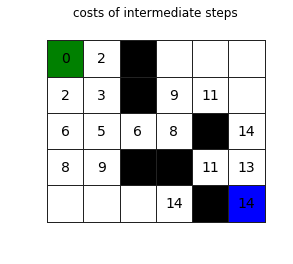

In [16]:
## Now let's see the difference
# delta_cost=[2,2,2,2,2,2,2,2]

cost, cost_matrix, expansion, actions = Astar_Path(grid, start, goal)
cost2, cost_matrix2, expansion2, actions2 = Astar_Path(grid, start, goal)

fig = plt.figure(1)  # create figure
ax = fig.add_subplot(111)  # create axes for plot
visualize()
drawcost(cost_matrix)
plt.title("costs of intermediate steps")
plt.show()

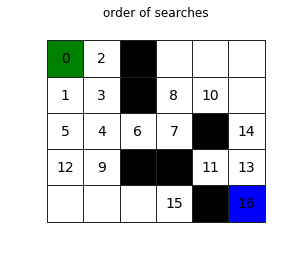

In [17]:
fig = plt.figure(1)  # create figure
ax = fig.add_subplot(111)  # create axes for plot
visualize()
drawcost(expansion)
plt.title("order of searches")
plt.show()

**The upper right and lower left cells are no longer searched for**, suggesting that A* improves the search performance. The improvement will be more significant if the map size is bigger.

The path is:
[(0, 0), (1, 1), (2, 2), (2, 3), (3, 4), (4, 5)]


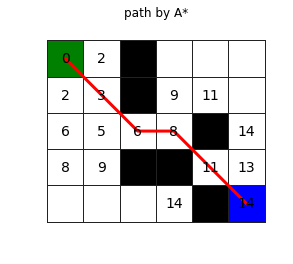

In [18]:
path = getPath(actions, goal, start)
print("The path is:")
print(path)

fig = plt.figure(1)  # create figure
ax = fig.add_subplot(111)  # create axes for plot
visualize()
drawcost(cost_matrix)
drawPath(path)
plt.title("path by A*")
plt.show()

**The same cost to goal is achieved** but with **--less--** searches

# Dynamic Programming
Although breadth first search and low cost first search can give the path for most cases, however, for some extreme cases, the result is not guaranteed to be optimal. Another way of solving the path searching problem is dynamic programming. The idea of dynamic programming is that we make a scan of all the cells and try to decrease its cost by trying all possible actions and decreasing the cost as long as a lower cost path can be found, until no more decrease of the cost can be applied. This idea is very close to the value iteration in reinforcement learning. But this method will take longer time to compute.

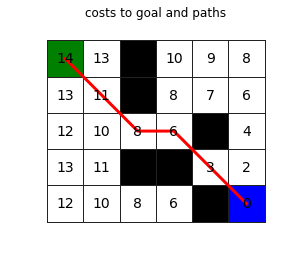

In [19]:
def DP_Path(grid, goal):
    '''
    (matrix, index, index) ==> (number, matrix)

    return the total cost from start to goal, assuming that the cost of each step is 1
    '''
    gridcol = len(grid[0])  # number of cols of grid
    gridrow = len(grid)  # number of rows of grid
    cost_matrix = [[1000 for i in range(gridcol)] for j in range(gridrow)]  # keep track of the cost of search
    actions = [[-1 for i in range(gridcol)] for j in range(gridrow)]  # keep track of the actions at each step

    cost_matrix[goal[0]][goal[1]] = 0
    it = 0
    modified = True
    while modified:  # if there is modification
        modified = False
        it += 1
        for i in range(gridrow):
            for j in range(gridcol):
                if grid[i][j] == 0:
                    for actnum, move in enumerate(delta):
                        x = i + move[0]
                        y = j + move[1]
                        if 0 <= x < gridrow and 0 <= y < gridcol and delta_cost[actnum] + cost_matrix[x][y] < \
                                cost_matrix[i][j]:
                            ## update cost if cost is lower
                            cost_matrix[i][j] = cost_matrix[x][y] + delta_cost[actnum]
                            actions[i][j] = actnum
                            modified = True
    return cost_matrix, actions, it


cost_matrix, actions, it = DP_Path(grid, goal)

fig = plt.figure(1)  # create figure
ax = fig.add_subplot(111)  # create axes for plot

visualize()
drawcost(cost_matrix)
drawPath(path)
plt.title("costs to goal and paths")
plt.show()

## Left Turn Policy
with dynamic programming, one interesting thing is that we can implement some code to achieve the left turn policy which avoids left turns given that the cost of turning left is higher than go straight and go right

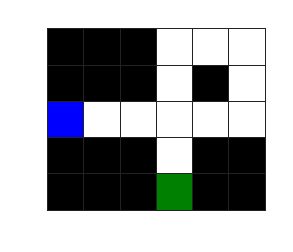

In [20]:
grid = [[-1, -1, -1, 0, 0, 0],
        [-1, -1, -1, 0, -1, 0],
        [0, 0, 0, 0, 0, 0],
        [-1, -1, -1, 0, -1, -1],
        [-1, -1, -1, 0, -1, -1]]
start = (4, 3)
goal = (2, 0)
fig = plt.figure(1)  # create figure
ax = fig.add_subplot(111)  # create axes for plot
visualize()
plt.show()


We can provide some function to calculate the paths by dynamic programming with cost of [2, 1, 20] for going right, straight and left and the solution would be a path that takes right turns without making left turns

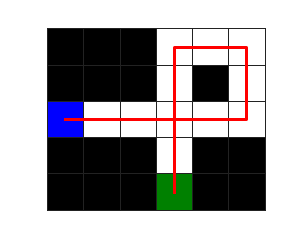

In [21]:
# def optimum_policy2D(grid, init, goal, cost):
# '''
# the function body is intentionally hided to prevent leaking of course materials.
# send me an email for implementation details
# '''
#     pass

## the resulted path after this function should be
path = [(4, 3), (3, 3), (2, 3), (1, 3), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (2, 0)]

fig = plt.figure(1)  # create figure
ax = fig.add_subplot(111)  # create axes for plot
visualize()
drawPath(path)
plt.show()
